# Übungsblatt 5

Abgabe von: Vorname, Nachname & Vorname, Nachname & Vorname, Nachname ...

## Aufgabe 1

In [39]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pylab

# Helper functions for generating points and labels
def class1_point(x):
    return np.array([2+np.sin(.2*x+8)*np.sqrt(x+10), -1+np.cos(0.2*x+8)*np.sqrt(x+10)]), 1

def class2_point(x):
    return np.array([2+np.sin(.2*x-8)*np.sqrt(x+10), -1+np.cos(0.2*x-8)*np.sqrt(x+10)]), -1

data = []
labels = []

# Init data
for u in range(1, 251):
    point, label = class1_point(u)
    data.append(point)
    labels.append(label)
    
for u in range(1, 251):
    point, label = class2_point(u)
    data.append(point)
    labels.append(label)
    
data = np.array(data)
labels = np.array(labels)
 
# Split data
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, shuffle=True)

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

# Shuffle data
X_train, y_train = unison_shuffled_copies(data, labels)

# Network Parameters
hidden_neurons = 75

weights_hidden_to_output = np.random.uniform(-1,1,hidden_neurons)

In [40]:
def euclidean(x, y):
    return np.linalg.norm(x-y)

def check_equal(x, y):
    new_x = []
    new_y = []
    for ele in x:
        new_x.append(list(ele))
    for ele in y:
        new_y.append(list(ele))
    return sorted(new_x) == sorted(new_y)

def kmeans(X, k, iterations):
    centers = X[:k]
    unchanged = False
    iteration = 0
    
    for _ in range(iterations):
        cluster = [[] for i in range(len(centers))]

        for x in X:
            distances_list = []
            min_index = 0
            min_value = euclidean(centers[0], x)
            for index, center in enumerate(centers):
                curr_distance = euclidean(center, x)
                if curr_distance < min_value:
                    min_value = curr_distance
                    min_index = index
            cluster[min_index].append(x)

        prev_centers = centers.copy()
        centers = []

        for i in range(len(cluster)):
            cluster_mean = np.mean(cluster[i], axis=0)
            centers.append(cluster_mean)

        if check_equal(prev_centers, centers):
            break

    standard_deviations = np.array([np.std(x) for x in cluster])
    centers = np.array(centers)
    return centers, standard_deviations

In [41]:
epochs = 500
learning_rate = 0.05

centers, standard_deviations = kmeans(X_train, hidden_neurons, 10000)

def rbf_in(x, center):
    return euclidean(x, center)
    
def rbf_out(rbf_in, standard_deviation):
    return np.exp(-rbf_in**2/(2*standard_deviation**2))

def calculate_output(x, centers, weights):
    output = 0
    for j in range(len(centers)):
        output += rbf_out(rbf_in(x, centers[j]), standard_deviations[j]) * weights_hidden_to_output[j]
    return output

for epoch in range(epochs):
    for i in range(len(X_train)):
        x = X_train[i]
        y = y_train[i]
        # Forward pass
        output = calculate_output(x, centers, weights_hidden_to_output)
        # Delta Aktualisierung
        for j in range(len(weights_hidden_to_output)):
            weights_hidden_to_output[j] += learning_rate * (y_train[i] - output) * rbf_out(rbf_in(x, centers[j]), standard_deviations[j])


In [42]:
all_points = X_train
values = y_train
class_1_x_points = []
class_2_x_points = []
class_1_y_points = []
class_2_y_points = []
for index in range(len(values)):
    if values[index] == 1:
        class_1_x_points.append(all_points[index][0])
        class_1_y_points.append(all_points[index][1])
    else:
        class_2_x_points.append(all_points[index][0])
        class_2_y_points.append(all_points[index][1])

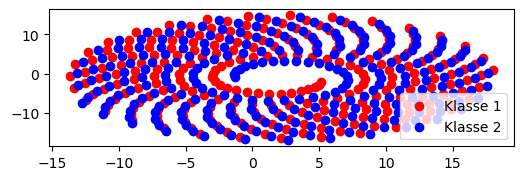

In [43]:
fig = plt.figure()
fig.set_dpi(100)
ax = fig.add_subplot(2,1,1)
ax.scatter(class_1_x_points, class_1_y_points,c="red", label="Klasse 1")
ax.scatter(class_2_x_points, class_2_y_points,c="blue", label="Klasse 2")
ax.legend()
pylab.show()

In [47]:
all_points = [np.array([x,y]) for x in np.arange(-18,18.1,.1) for y in np.arange(-18, 18.1,.1)]
values = [np.sign(calculate_output(point, centers, weights_hidden_to_output)) for point in all_points]
class_1_x_points = []
class_2_x_points = []
class_1_y_points = []
class_2_y_points = []
for index in range(len(values)):
    if values[index] == 1:
        class_1_x_points.append(all_points[index][0])
        class_1_y_points.append(all_points[index][1])
    else:
        class_2_x_points.append(all_points[index][0])
        class_2_y_points.append(all_points[index][1])

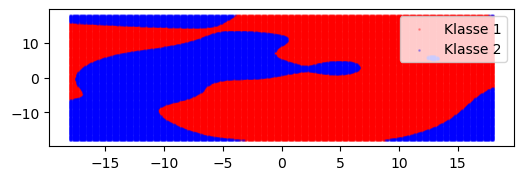

In [48]:
fig = plt.figure()
fig.set_dpi(100)
ax = fig.add_subplot(2,1,1)
ax.scatter(class_1_x_points, class_1_y_points,c="red", label="Klasse 1",alpha=0.25,s=1)
ax.scatter(class_2_x_points, class_2_y_points,c="blue", label="Klasse 2",alpha=0.25,s=1)
ax.legend()
pylab.show()

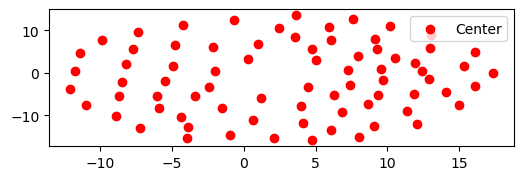

In [46]:
centers_x = []
centers_y = []
for center in centers:
    centers_x.append(center[0])
    centers_y.append(center[1])

fig = plt.figure()
fig.set_dpi(100)
ax = fig.add_subplot(2,1,1)
ax.scatter(centers_x, centers_y,c="red", label="Center")
ax.legend()
pylab.show()

## Aufgabe 2

Das Ziel dieses Teils des Notebooks ist es, dass ihr euch mit PyTorch vertraut macht und nicht abgeschreckt werdet vom schieren Umfang des Frameworks. Die grundlegenden Dinge haben wir für euch implementiert und Sachen, wie das Laden der Daten, übernommen. Damit sollt ihr einen Überblick kriegen, wie man ein neuronales Netz strukturiert sowie aufbaut und im Anschluss daran das Netz trainiert.

An den Stellen, wo ihr selbst noch Code ergänzen sollt haben wir "########### CODE ERGÄNZEN ###########" an den Start der Zelle geschrieben. Was genau ihr ergänzen sollt haben wir an den entsprechenden Punkten hingeschrieben.

In [50]:
# imports

import torch                                        # PyTorch
import torch.nn as nn                               # Enthält wichtigste Funktionen und vor allem die Layer für Neuronale Netze
import torch.nn.functional as F                     # Enthält die Implementierungen der Layer und weitere wichtige Funktionen
import torch.optim as optim                         # Enthält die Optimierer und vieles mehr zum effizienten lernen und automatische Backpropagation
from torch.utils.data import Dataset, DataLoader    # Datset und DataLoader werden benötigt, um Daten zu laden und ordentlich zu repräsentieren
from torchvision import datasets                    # Enthält Möglichkeiten verschiedene Datensets herunterzuladen
import matplotlib.pyplot as plt                     # Matplotlib zum Zeichnen von Diagrammen
import numpy as np                                  # Numpy für schnelle Rechnungen auf der CPU
import seaborn as sns                               # Zum Plotten - an manchen Stellen einfacher als matplotlib

In [51]:
# Wer eine GPU hat, kann diese nutzen. Sollte keine GPU vorhanden sein erkennt PyTorch automatisch die CPU.
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

In [52]:
# In diesem Schritt werden die Daten heruntergeladen und gespeichert.

data_folder = './data/MNIST'
tr_mnist = datasets.MNIST(data_folder, download = True, train = True) # Lädt das Trainingsdatenset mit 60k Bildern herunter
val_mnist = datasets.MNIST(data_folder, download = True, train = False) # Lädt das Testdatenset mit 10k Bildern herunter

tr_images = tr_mnist.data # "Speichert" die Bilder in der entsprechenden Variable
tr_label = tr_mnist.targets # "Speichert" die Labels in der entsprechenden Variable

val_images = val_mnist.data
val_label = val_mnist.targets

1.4%

100.0%


Extracting ./data/MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw


14.2%

102.8%
3.6%

Extracting ./data/MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



100.0%


Extracting ./data/MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data/MNIST\MNIST\raw



112.7%

Extracting ./data/MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data/MNIST\MNIST\raw



In [53]:
# Hier erstellen wir eine Klasse die von Dataset erbt, um die Daten im DataLoader nutzen zu können und über batches iterieren zu können.

class MNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255. # Zur Normalisierung
        x = x.view(-1, 1, 28, 28) # Tensoren müssen die Form (B, C, H, W) mit B=Batch Größe, C=Kanäle (3 für RBG, 1 für Schwarz/Weiß), H=Höhe und W = Breite
        self.x, self.y = x, y

    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device) # Hiermit werden die Daten auf die CPU/RAM oder die GPU geladen

    def __len__(self):
        return len(self.x)

In [64]:
########## CODE ERGÄNZEN #########

# Erstellung des Netzes

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.cnn = nn.Sequential(
            # TODO: Convolutional Neural Network implementieren mit Flatten zum Schluss
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.cnn2 = nn.Sequential(
            # TODO: Convolutional Neural Network implementieren mit Flatten zum Schluss
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.fc = nn.Sequential(
            # TODO: Fully Connected Layer einfügen bis zur Ausgabe
            nn.Linear(32 * 7 * 7, 10)
        )

    def forward(self, input):
        # TODO: Modell zusammensetzen und Ausgabe zurückgeben
        input = self.cnn(input)
        input = self.cnn2(input)
        # Flatten zum Schluss
        input = input.view(x.size(0), -1)
        output = self.fc(input)
        return output

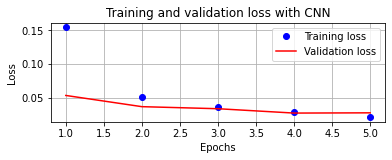

C:\Users\User\AppData\Local\Temp\ipykernel_8744\1221710966.py:106: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


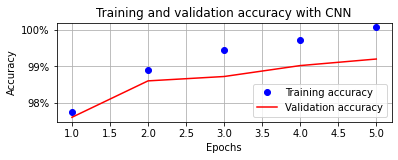

In [90]:
########## CODE ERGÄNZEN #########

# Training und Evaluation des Netzes

def get_data():     
    train = MNISTDataset(tr_images, tr_label)     
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = MNISTDataset(val_images, val_label)     
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=True)
    return trn_dl, val_dl

def train_batch(x, y, model, opt, loss_fn):
    # TODO: selbst implementieren und auf richtige Reihenfolge von .backward(), .step() und .zero_grad() achten.
    # https://pytorch.org/tutorials/ ist hierfür ganz hilfreich
    opt.zero_grad()
    # Forward pass
    y_est = model(x)
    loss = loss_fn(y_est, y)
    # Backward pass
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()
    

@torch.no_grad()
def accuracy(x, y, model):
    # TODO: vorgegebenes Fehlermaß - in unserem Fall nehmen wir Accuracy - selbst programmieren
    correct = 0
    total = 0
    # model(x) liefert für jede Klasse einen Wert (also shape [10x32])
    # y liefert die Korrekten Klassen (also shape [32])
    for index, y_model in enumerate(model(x)):
        pred_y = torch.argmax(y_model)
        if pred_y == y[index]:
            correct += 1
        total += 1
    return correct / total

@torch.no_grad()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

# Wichtige Sachen laden und initialisieren
model = CNN()
model.to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

trn_dl, val_dl = get_data()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# Training
for epoch in range(5):
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.append(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    # TODO: Bestimmt den Loss auf dem Validation Datensatz und bestimmt dazu die Accuracy nach vorigen Beispielen
    # Nur ein Validierungsbatch, deshalb einfacher geschrieben
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        validation_loss = train_batch(x, y, model, optimizer, loss_fn)
    
    # Nur ein Validierungsbatch, deshalb einfacher geschrieben
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_accuracy = accuracy(x, y, model)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_accuracy)

epochs = np.arange(5)+1

plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with CNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

Ihr seht hier drei Möglichkeiten die Aktivierungsfunktion zu nutzen. Generell ist zu empfehlen, dass ihr euch für eine der Möglichkeiten entscheidet und diese übergreifend in euren Implementierungen nutzt und nicht die Möglichkeiten miteinander verbindet. Normalerweise werden die einzelnen Schichten eurer neuronalen Netze in der "\_\_init\_\_()" Funktion als Membervariablen hinzugefügt und aus "torch.nn" geladen. Die Aktivierungsfunktionen werden üblicherweise aus "torch.nn.functional" in der forward-Methode eingebunden und erhalten keinen Extraeintrag als Membervariable.

Zudem seht ihr hier in der obigen Codezelle, dass das eine andere Art der Implementierung ist, als wie wir sie von euch haben wollten. Das liegt daran, dass wir gesagt haben, dass man das obere Netz als zwei "unterschiedliche" Netze interpretieren kann; zum einen ein kovolutionales neuronales Netz und zum anderen ein voll vernetztes Netz. Man könnte das Ganze auch vereinfachend so machen, wie wir es in der Hinweiszelle implementiert haben. Wenn ihr euch einmal mit weiteren Strukturen wie beispielsweise Encoder-Decoder-Netzen beschäftigen solltet, dann ist es best practice die einzelnen Blöcke des Netzes in extra Klassenmembervariablen zu schreiben wie "self.encoder = nn.Sequential(...)" und "self.decoder = nn.Sequential(...)". 

In [ ]:
# Kleine Tipps, Tricks und Hinweise

# Die folgenden Imports haben sich übergreifend als Imports unter den entsprechenden Namen festgesetzt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Netzerstellung
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 1000)
        self.fc2 = nn.Linear(1000, 1000)
        self.fc3 = nn.Linear(1000, 10)
        self.dropout = nn.Dropout(p=0.5)
        self.activation = nn.Tanh() # Möglichkeit 1 - Aktivierungsfunktion als Membervariable der Klasse

    def forward(self, input):
        x = self.fc1(input)
        x = self.activation(x) # Möglichkeit 1
        x = self.fc2(x)
        x = F.tanh(x) # Möglichkeit 2 - aber F.tanh ist deprecated und nicht mehr empfohlen
        x = self.dropout(x)
        x = self.fc3(x)
        x = torch.tanh(x) # Möglichkeit 3
        return x



Falls ihr weitere Fragen habt, könnt ihr euch gerne an uns wenden :)